In [4]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [5]:
import re
import pandas as pd
import jieba
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB

In [47]:
'''数据加载类 DataLoader'''
'''这个类用于加载数据，它包含一个静态方法 load_data，接受文件路径作为参数，并返回从CSV文件中读取的数据。'''

'这个类用于加载数据，它包含一个静态方法 load_data，接受文件路径作为参数，并返回从CSV文件中读取的数据。'

In [48]:
class DataLoader:
    @staticmethod
    def load_data(file_path, encoding='utf-8'):
        with open(file_path, 'r', encoding='gbk') as f:
            return pd.read_csv(f)

In [49]:
'''文本处理类 TextProcessor'''

'文本处理类 TextProcessor'

In [50]:
class TextProcessor:
    @staticmethod
    def data_cut(review):
        item = re.sub('@.*?:', '', review)
        item = re.sub('@.*?：', '', item)
        item = re.sub(r'\W+', ' ', item).replace('_', ' ')
        cut = jieba.lcut(item)
        segResult = [word for word in cut if ('\u4e00' <= word <= '\u9fa5')]
        return ' '.join(segResult)

    @staticmethod
    def del_stopwords(words, stopwords):
        w = [word for word in words.split(' ') if word not in stopwords]
        return ' '.join(w)

In [51]:
'''SentimentAnalysis 类改动'''

'SentimentAnalysis 类改动'

In [52]:
class SentimentAnalysis:
    def __init__(self, file_path, stopword_file):
        self.file_path = file_path
        self.stopword_file = stopword_file
        self.data_loader = DataLoader()
        self.text_processor = TextProcessor()
        self.classifiers = [LinearSVC, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]

    def load_stopwords(self):
        stopwords = []
        with open(self.stopword_file, encoding='utf-8') as f:
            for word in f:
                stopwords.append(word.strip())
        return stopwords

    def preprocess_data(self):
        data = self.data_loader.load_data(self.file_path)
        stopwords = self.load_stopwords()

    # Convert 'review' column to string type
        data['review'] = data['review'].astype(str)

        data['review_cut'] = data['review'].apply(self.text_processor.data_cut)
        data['del_stopwords'] = data['review_cut'].apply(self.text_processor.del_stopwords, stopwords=stopwords)

        data = data.dropna()
        review_cut_list = data['del_stopwords'].tolist()

        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform((d for d in review_cut_list))
        labels = data['label'].tolist()

        return train_test_split(X, labels, test_size=0.2, random_state=666)
    
    @staticmethod
    def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
        clf = classifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Classifier: {classifier.__name__}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")

In [53]:

if __name__ == "__main__":
    file_path = './data/weibo_senti_10k.csv'
    stopword_file = './dictionary/stopwords.txt'

    sa = SentimentAnalysis(file_path, stopword_file)
    X_train, X_test, y_train, y_test = sa.preprocess_data()

    classifiers = [LinearSVC, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]
    for classifier in classifiers:
        sa.train_and_evaluate(classifier, X_train, y_train, X_test, y_test)

C:\data\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC
Accuracy: 0.7747326203208557
Precision: 0.7753674801337661
Recall: 0.7747326203208557
F1 Score: 0.7744071901881123
Classifier: MultinomialNB
Accuracy: 0.7633689839572193
Precision: 0.7701431518756693
Recall: 0.7633689839572193
F1 Score: 0.7624189038790412
Classifier: DecisionTreeClassifier
Accuracy: 0.7466577540106952
Precision: 0.7478690649813644
Recall: 0.7466577540106952
F1 Score: 0.7460130819753158
Classifier: RandomForestClassifier
Accuracy: 0.7901069518716578
Precision: 0.7936628138980361
Recall: 0.7901069518716578
F1 Score: 0.7891101652914949
Classifier: AdaBoostClassifier
Accuracy: 0.7566844919786097
Precision: 0.7635653916537011
Recall: 0.7566844919786097
F1 Score: 0.7544321571535685


Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\TEMP\jieba.cache
Loading model cost 1.674 seconds.
Prefix dict has been built successfully.
C:\data\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\data\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC
Accuracy: 0.7747326203208557
Precision: 0.7753674801337661
Recall: 0.7747326203208557
F1 Score: 0.7744071901881123


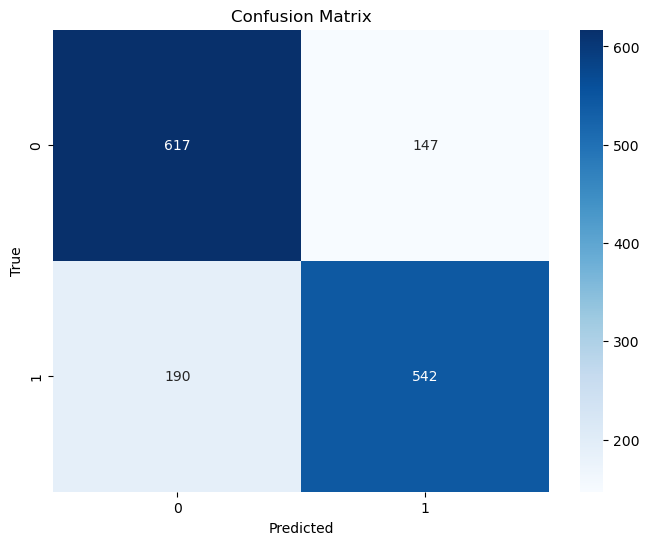

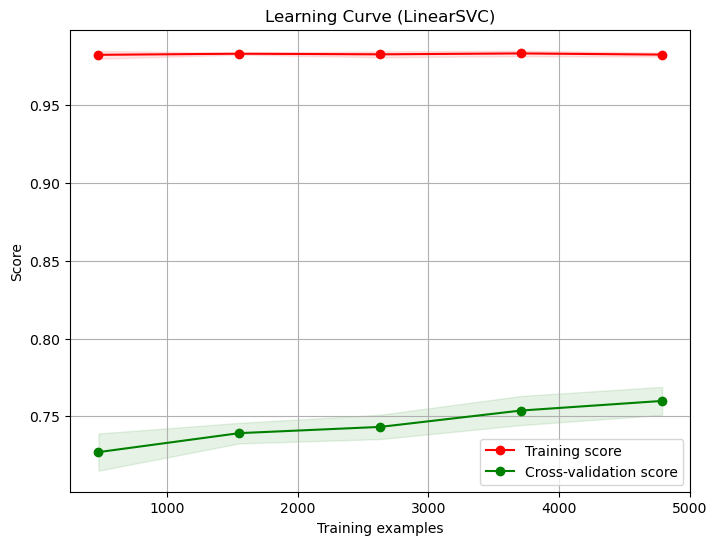

Classifier: MultinomialNB
Accuracy: 0.767379679144385
Precision: 0.7715225011731645
Recall: 0.767379679144385
F1 Score: 0.7668963500897326


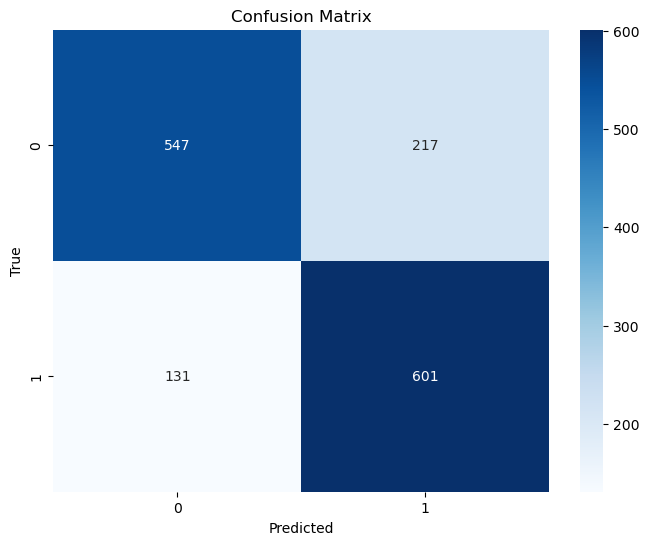

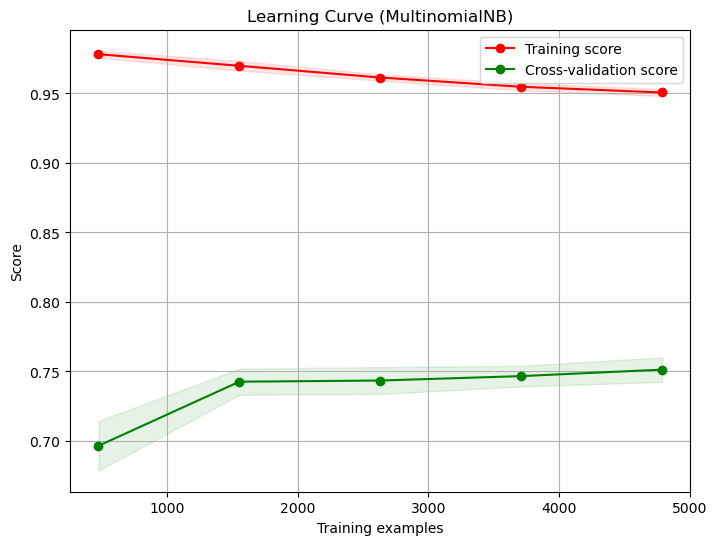

Classifier: DecisionTreeClassifier
Accuracy: 0.7506684491978609
Precision: 0.7520124336530979
Recall: 0.7506684491978609
F1 Score: 0.7499989761800019


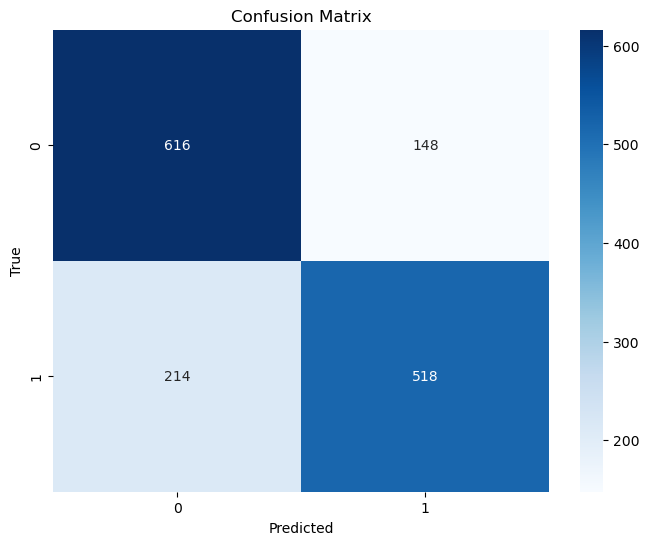

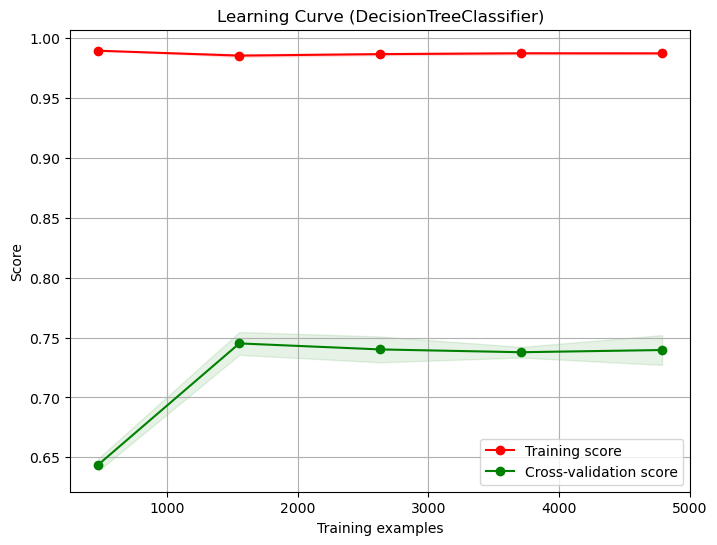

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance
import numpy as np



    @staticmethod
    def plot_confusion_matrix(y_true, y_pred, labels):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    @staticmethod
    def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure(figsize=(8, 6))
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.title(title)
        plt.legend(loc="best")
        plt.grid()
        plt.show()

    @staticmethod
    def plot_feature_importance(importance, features, title):
        sorted_idx = importance.argsort()
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(title)
        plt.show()

if __name__ == "__main__":
    file_path = './data/weibo_senti_10k.csv'
    stopword_file = './dictionary/stopwords.txt'

    sa = SentimentAnalysis(file_path, stopword_file)
    X_train, X_test, y_train, y_test = sa.preprocess_data()

    classifiers = [LinearSVC, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier]
    for classifier in classifiers:
        sa.train_and_evaluate(classifier, X_train, y_train, X_test, y_test)

        # Plot Confusion Matrix
        clf = classifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        SentimentAnalysis.plot_confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

        # Plot Learning Curve
        SentimentAnalysis.plot_learning_curve(clf, f"Learning Curve ({classifier.__name__})", X_train, y_train, cv=5)

        # Plot Feature Importance for DecisionTreeClassifier and RandomForestClassifier
        if classifier in [DecisionTreeClassifier, RandomForestClassifier]:
            importance = permutation_importance(clf, X_test, y_test).importances_mean
            features = vectorizer.get_feature_names_out()
            SentimentAnalysis.plot_feature_importance(importance, features, f"Feature Importance - {classifier.__name__}")